<a href="https://colab.research.google.com/github/chiaomei999/Object-oriented-programming-HW/blob/main/HW3_F24066179.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

參考教學
https://stackoverflow.com/questions/19578367/number-addition-and-subtraction-in-c-classes


Reduced Form
https://www.daniweb.com/programming/software-development/threads/395461/reducing-rational-numbers

In [ ]:
%%writefile HW3.cpp

#include <iostream>
#include <iomanip>
#include <string>
#include <string.h>
using namespace std;

//給定一種新的type叫做Rational
class Rational {
    //member function
public:
    Rational(); //constructor (default值，不能return任何東西)  
    void Set(int, int, int);
    int GetNumerator();
    int GetDenominator();
    void reducedForm();
    void sameDenomForm();

    Rational add(Rational);
    Rational substract(Rational);
    Rational multiply(Rational);
    Rational divide(Rational);

    void printAnB();

    //data member
private:
    int ID; //我輸入的第幾個數
    int numerator; //分子
    int denominator; //分母
    float conclusion; //小數點形式
    int sameDenom; //通分後的分母
}; //end class Rational

//Rational Constructor
Rational::Rational() {
    numerator = denominator = conclusion = sameDenom = 1;
}

//Set尚未化簡的原始分子分母
void Rational::Set(int IDA, int numeratorA, int denominatorA) {
    ID = IDA;
    if (numeratorA > 0) {
        numerator = numeratorA;
    }
    if (denominatorA > 0) {
        denominator = denominatorA;
    }
    conclusion = numerator / (denominator + 0.0); //分母+0.0是為了變成有小數點的寫法，不然conclusion print出來會變成0(小數點下被捨去)
    cout << "Set MyRational_" << ID << " as " << numerator << "/" << denominator << " = " << conclusion << endl;
} //end funct.

//將分數化為最簡
void Rational::reducedForm() {   
    int largest; // initializes largest
    largest = numerator > denominator ? numerator : denominator;
    int gcd = 0; // greatest common divisor
    for (int loop = 2; loop <= largest; loop++) {
        if (numerator % loop == 0 && denominator % loop == 0)
        gcd = loop;
    }
    if (gcd != 0){
        numerator /= gcd;
        denominator /= gcd;
    } 
} //end funct.


//Get分子
int Rational::GetNumerator() {
    return numerator;
}
//Get分母
int Rational::GetDenominator() {
    return denominator;
}

void Rational::printAnB() {
    cout << "MyRational_" << ID << " reduced form is: " << numerator << "/" << denominator << endl;
}

//加法
Rational Rational::add(Rational otherRational) {
    int new_den = otherRational.GetDenominator() * this->GetDenominator();   //this是我自己這個object  //將分母通分
    int new_num = otherRational.GetNumerator() * this->GetDenominator() + otherRational.GetDenominator() * this->GetNumerator();  //計算分子
    Rational result_add;
    result_add.Set(3,new_num, new_den);
    result_add.reducedForm();
    return result_add;
}

//減法
Rational Rational::substract(Rational otherRational) {
    int new_den = otherRational.GetDenominator() * this->GetDenominator();   //this是我自己這個object  //將分母通分
    int new_num = otherRational.GetDenominator() * this->GetNumerator() - otherRational.GetNumerator() * this->GetDenominator();  //計算分子
    Rational result_substract;
    result_substract.Set(4, new_num, new_den);
    result_substract.reducedForm();
    return result_substract;
}

//乘法
Rational Rational::multiply(Rational otherRational) {
    int new_den = this->GetDenominator() * otherRational.GetDenominator();   //this是我自己這個object  //將分母通分
    int new_num = this->GetNumerator() * otherRational.GetNumerator();  //計算分子
    Rational result_Rational;
    result_Rational.Set(5, new_num, new_den);
    result_Rational.reducedForm();
    return result_Rational;
}

//除法  //乘上倒數
Rational Rational::divide(Rational otherRational) {
    int new_den = this->GetDenominator() * otherRational.GetNumerator();   //this是我自己這個object 
    int new_num = this->GetNumerator() * otherRational.GetDenominator();  //計算分子
    Rational result_Rational;
    result_Rational.Set(6, new_num, new_den);
    result_Rational.reducedForm();
    return result_Rational;
}

int main() {

    //MyRational 有個type Rational的物件叫MyRational
    Rational MyRationalA;
    Rational MyRationalB;

    //給定值
    MyRationalA.Set(1, 2, 4);  //change content
    MyRationalB.Set(2, 1, 6);  //change content

    //將分子分母化簡
    MyRationalA.reducedForm();
    MyRationalB.reducedForm();

    MyRationalA.printAnB();
    MyRationalB.printAnB();

    cout << "\n**Add: " << endl;
    Rational add_result = MyRationalA.add(MyRationalB);
    add_result.printAnB();

    cout << "\n**Substact: " << endl;
    Rational substract_result = MyRationalA.substract(MyRationalB);
    substract_result.printAnB();

    cout << "\n**Multiply: " << endl;
    Rational multiply_result = MyRationalA.multiply(MyRationalB);
    multiply_result.printAnB();

    cout << "\n**Divide: " << endl;
    Rational divide_result = MyRationalA.divide(MyRationalB);
    divide_result.printAnB();

    return 0;
}

Writing HW3.cpp


In [ ]:
%%shell

g++ HW3.cpp -o HW3
./HW3

Set MyRational_1 as 2/4 = 0.5
Set MyRational_2 as 1/6 = 0.166667
MyRational_1 reduced form is: 1/2
MyRational_2 reduced form is: 1/6

**Add: 
Set MyRational_3 as 8/12 = 0.666667
MyRational_3 reduced form is: 2/3

**Substact: 
Set MyRational_4 as 4/12 = 0.333333
MyRational_4 reduced form is: 1/3

**Multiply: 
Set MyRational_5 as 1/12 = 0.0833333
MyRational_5 reduced form is: 1/12

**Divide: 
Set MyRational_6 as 6/2 = 3
MyRational_6 reduced form is: 3/1


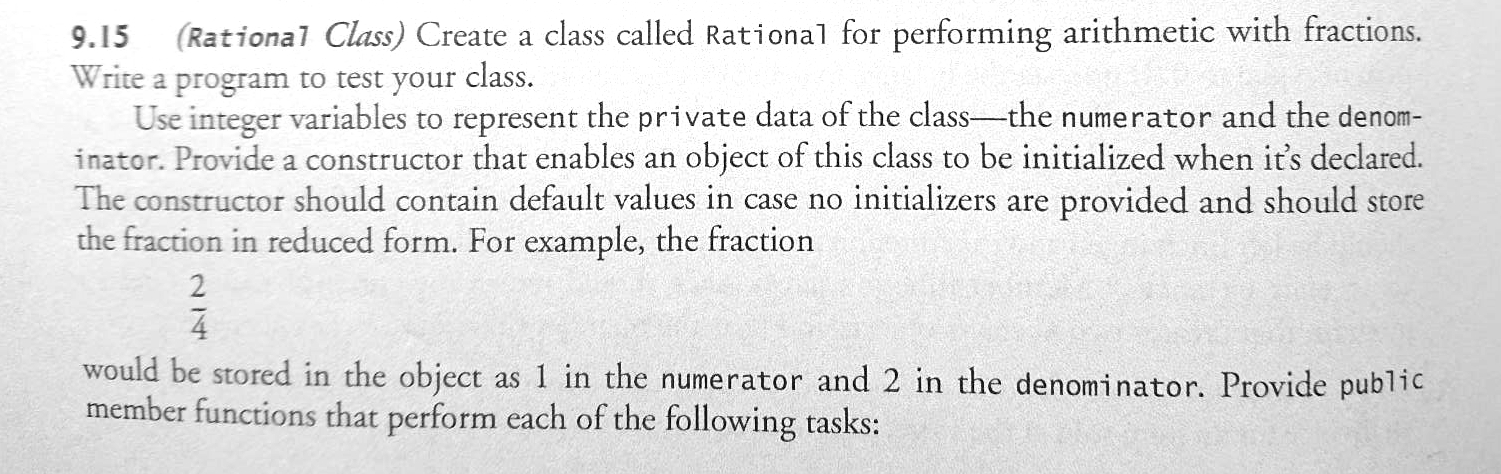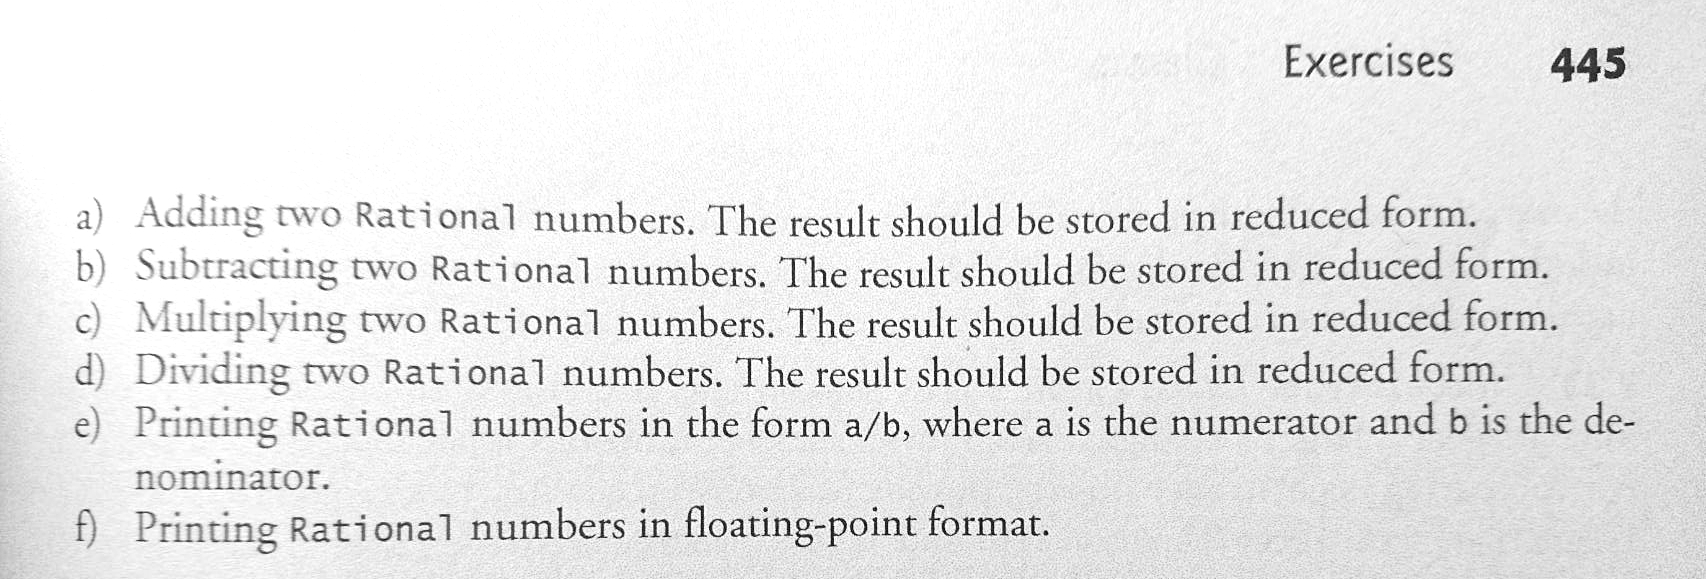